# **DATA MODELING - CLASSIFICATION - NOTEBOOK**

## Objectives

* Fit and evaluate a classification model to predict damage levels for a prospect that will likely suffer a damage

## Inputs

* outputs/datasets/collection/dataPP5_cleaned_10k.csv

## Outputs

* Train set (features and target)
* Test set (features and target)
* ML pipeline to predict amount
* labels map
* Feature Importance Plot

## Comments

* steps to prepare the data for the model, then the model
* pipeline should identify a training outcome and a prediction outcome, through 
   * predictor estimator .fit() & .predict() 
   * transformer estimator .fit() & .transform()


---

# Change working directory

* access the current directory
* make the parent of the current directory the new current directory

In [1]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspace/PP5_My_project'

---

# Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from sklearn.pipeline import Pipeline

---

# Load Data

old path: outputs/datasets/collection/dataPP5_cleaned.csv

In [7]:
df = pd.read_csv('outputs/datasets/datacleaned/v1/dataPP5_cleaned_10k.csv').query("Damage == 1").drop(labels=['DATE OCC', 'LAT', 'LON', 'Damage'], axis=1)
print(df.shape)
df.head(3)

(5781, 16)


,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount
1,1130,14,Pacific,330,BURGLARY FROM VEHICLE,32,F,W,101.0,STREET,999.0,NO WEAPON,2400 CLARK AV,NO CROSS STREET,1,2000.0
2,2130,1,Central,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",34,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",999.0,NO WEAPON,1200 S FIGUEROA ST,NO CROSS STREET,7,900.0
3,1700,21,Topanga,510,VEHICLE - STOLEN,0,X,X,108.0,PARKING LOT,999.0,NO WEAPON,7000 ALABAMA AV,NO CROSS STREET,3,20000.0


---

## Feature Scaling and Feature Selection

### Feature Scaling 

* to give the data the properties of a standard normal distribution with a mean of zero and a standard deviation of one
* the variable distribution will be slightly different, but we create better condition for the algorithm to learn the patterns and relationships and generalize on unseen data

In [8]:
# Using StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create Pipeline
pipeline = Pipeline([
    ("ScaleMeGood", StandardScaler())
])

In [9]:
# Loading TrainSetRegressionCleaned.csv
dftrainreg = pd.read_csv('outputs/datasets/cleaned/TrainSetRegressionCleaned.csv').drop(labels=['LAT', 'LON'], axis=1)
print(dftrainreg.shape)
dftrainreg.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/datasets/cleaned/TrainSetRegressionCleaned.csv'

In [ ]:
# Loading TestSetRegressionCleaned.csv
dftestreg = pd.read_csv('outputs/datasets/cleaned/TestSetRegressionCleaned.csv').drop(labels=['LAT', 'LON'], axis=1)
print(dftestreg.shape)
dftestreg.head(10)

(2000, 20)


,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount,Damage,Year_OCC,Month_OCC,Day_OCC
0,2300,18,14,510,95,0,2,15,101.0,164,999.0,31,6654,184,7,20000.0,1,2020,2,16
1,1900,5,4,510,95,0,2,15,101.0,164,999.0,31,78,574,3,20000.0,1,2022,10,19
2,1820,1,1,210,70,27,0,14,104.0,42,400.0,46,975,574,3,10000.0,1,2021,4,14
3,745,14,12,437,69,0,2,15,101.0,164,400.0,46,7062,747,7,0.0,0,2021,3,14
4,1045,2,13,220,3,0,2,15,406.0,132,200.0,26,2006,574,7,2000.0,1,2021,1,17
5,1510,5,4,850,51,36,0,6,101.0,164,999.0,31,4002,574,2,0.0,0,2022,2,1
6,130,18,14,510,95,0,2,15,101.0,164,999.0,31,863,512,7,20000.0,1,2020,5,10
7,1400,7,20,442,74,21,2,15,203.0,128,999.0,31,27,574,7,950.0,1,2022,11,13
8,100,18,14,740,92,26,0,1,501.0,157,999.0,31,6268,574,5,900.0,1,2023,2,17
9,1,20,11,649,40,0,2,15,502.0,118,999.0,31,1747,574,2,0.0,0,2020,2,18


In [ ]:
X_train = dftrainreg[['TIME OCC', 'AREA', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'LOCATION', 'Cross Street', 'Day of Week']]
y_train = dftrainreg[['Damage']]
print(X_train.shape, y_train.shape)

(8000, 11) (8000, 1)


In [ ]:
X_test = dftestreg[['TIME OCC', 'AREA', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'LOCATION', 'Cross Street', 'Day of Week']]
y_test = dftestreg[['Damage']]
print(X_test.shape, y_test.shape)

(2000, 11) (2000, 1)


In [ ]:
# Applying pipelines to ML and fit the pipeline to train set and based on this learning, transform the data on train and test set
pipeline.fit(X_train)
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(8000, 11) (2000, 11)


In [ ]:
# Testing the type, should be a numpy array
type(X_train_scaled)

numpy.ndarray

In [ ]:
# Converting it to a DataFrame
X_train_scaled = pd.DataFrame(data= X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data= X_test_scaled, columns=X_test.columns)
print(type(X_train_scaled), type(X_test_scaled))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


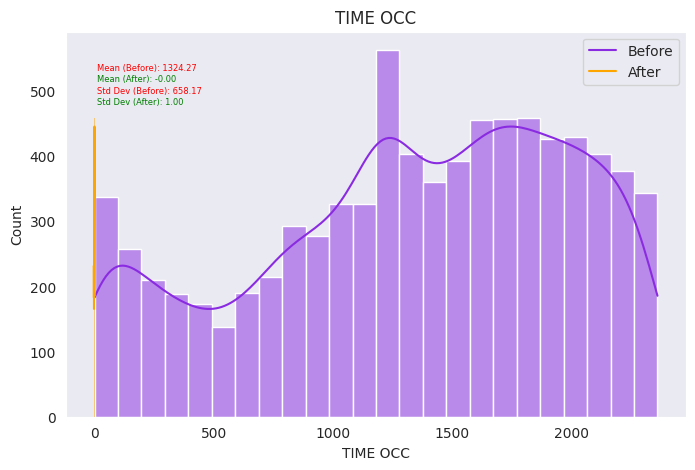

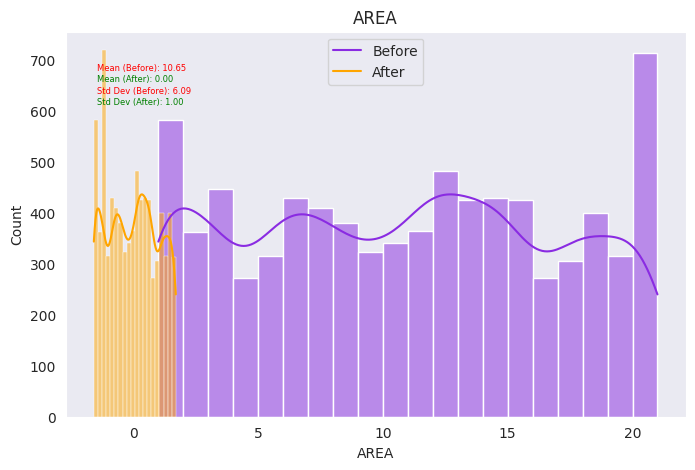

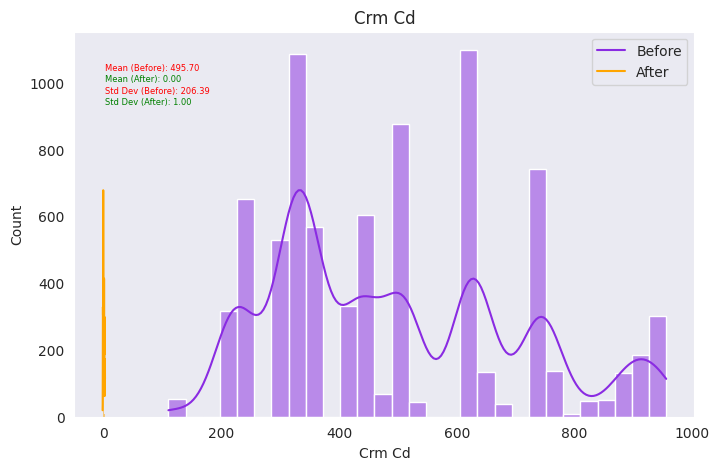

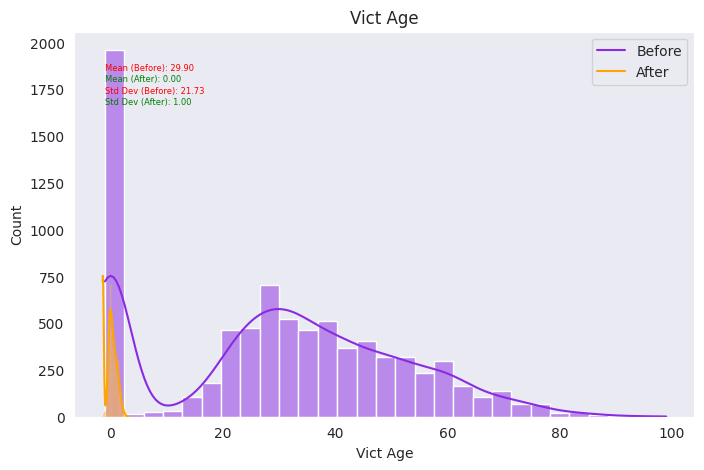

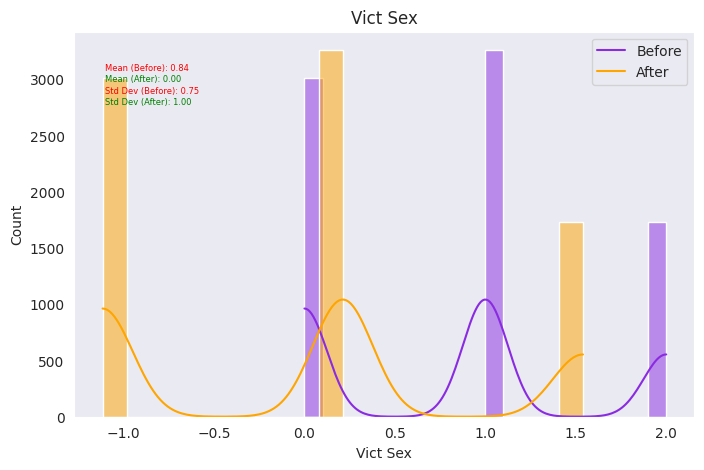

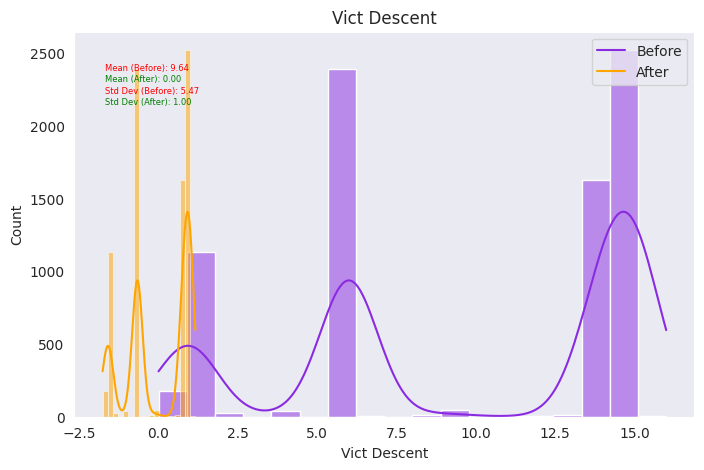

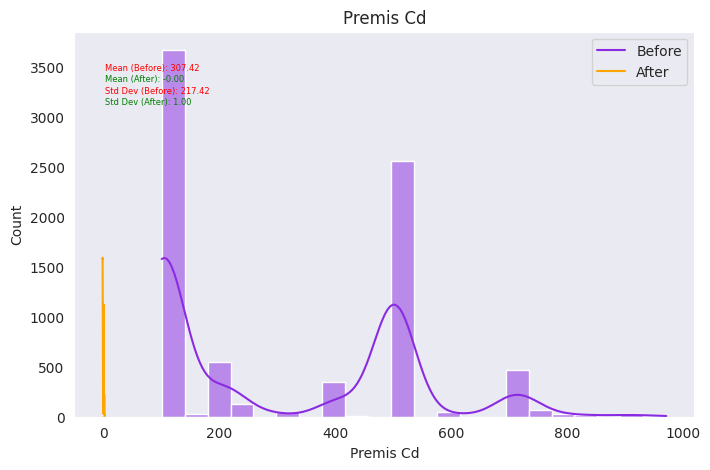

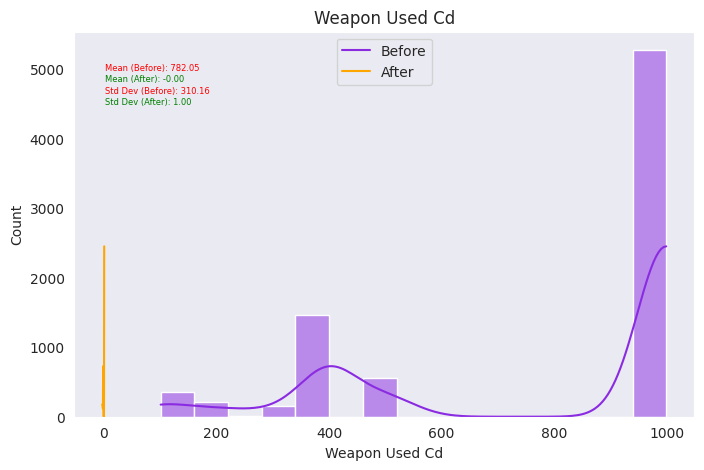

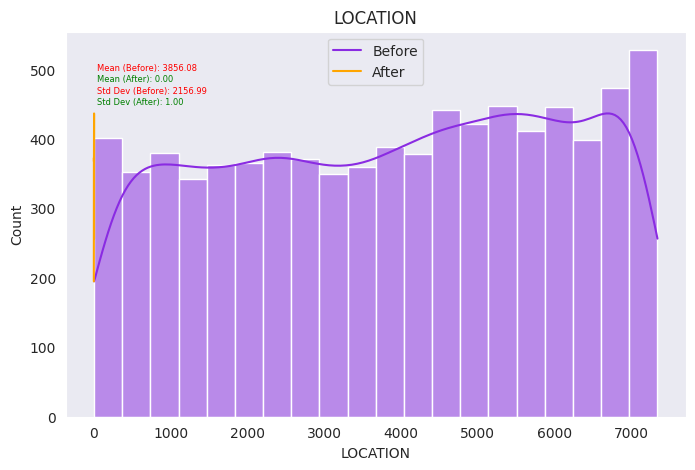

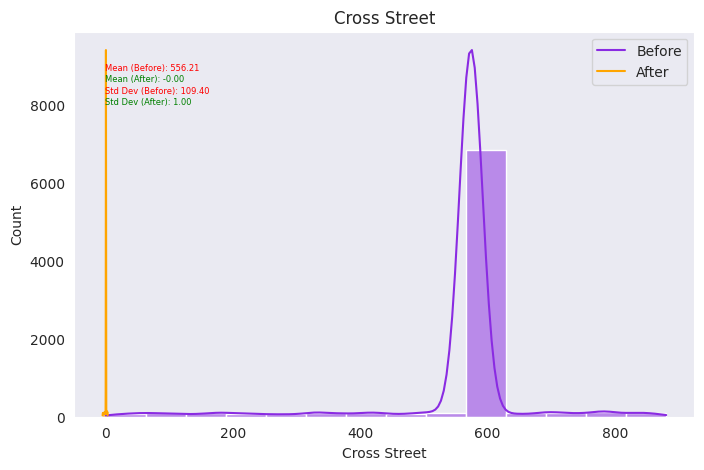

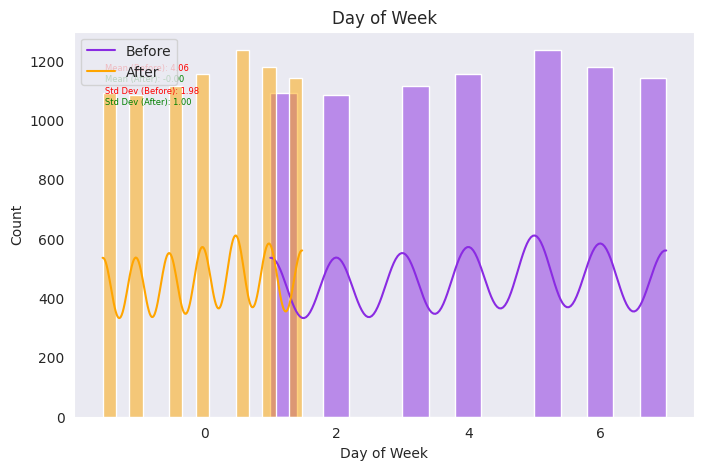

In [ ]:
# Difference before and after StandardScaler()
for col in X_train.columns:

    # Plot the histograms
    fig, axes = plt.subplots(figsize=(8,5))
    sns.histplot(data=X_train, x=col, kde=True, color='#8A2BE2', ax=axes)
    sns.histplot(data=X_train_scaled, x=col, kde=True, color='#FFA500', ax=axes)
    
    # Set plot title and legend
    axes.set_title(f"{col}")
    axes.legend(labels=['Before', 'After'])
    
    # Calculate and Display the mean on the plot
    mean_before = X_train[col].mean()
    mean_after = X_train_scaled[col].mean()
    axes.text(0.05, 0.9, f"Mean (Before): {mean_before:.2f}", transform=axes.transAxes, fontsize=6, color='red')
    axes.text(0.05, 0.87, f"Mean (After): {mean_after:.2f}", transform=axes.transAxes, fontsize=6, color='green')
    
    # Calculate and Display the standard deviation on the plot
    std_before = X_train[col].std()
    std_after = X_train_scaled[col].std()
    axes.text(0.05, 0.84, f"Std Dev (Before): {std_before:.2f}", transform=axes.transAxes, fontsize=6, color='red')
    axes.text(0.05, 0.81, f"Std Dev (After): {std_after:.2f}", transform=axes.transAxes, fontsize=6, color='green')
    
    # Show the plot
    plt.show()
    print("\n\n")

### Feature Selection 

* to obtain a process to select the relevant features for fitting the ML model
    * fewer and more relevant features = easier to interpret
    * no overfitting (normally)
    * time to train and feature space are reduced

* Using Embedded method (could also use Filter Method or Wrapper Method)
    * performs feature selection during training, finds the feature subset for the algorithm that is being trained
    * derives feature importance from the trained ML model, removing non-relevant features using the derived feature importance


In [ ]:
# Using SelectFromModel()
from sklearn.feature_selection import SelectFromModel

# Using Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier

# Create Pipeline
pipeline = Pipeline([
    ("ScaleMeGood", StandardScaler()),
    ("SelectMeGood", SelectFromModel(DecisionTreeClassifier(random_state=77))),
    ("ModelMeGood", DecisionTreeClassifier(random_state=77))
])

pipeline

Pipeline(steps=[('ScaleMeGood', StandardScaler()),
                ('SelectMeGood',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGood', DecisionTreeClassifier(random_state=77))])

In [ ]:
# Fitting the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ScaleMeGood', StandardScaler()),
                ('SelectMeGood',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGood', DecisionTreeClassifier(random_state=77))])

In [ ]:
# Access which features were selected
X_train.columns[pipeline['SelectMeGood'].get_support()]

Index(['Crm Cd', 'Weapon Used Cd'], dtype='object')

---

## Predictions

In [ ]:
# Using .predict() and parse the test set features (X_test)
ModelMeVeryGood = DecisionTreeClassifier()
ModelMeVeryGood.fit(X_train_scaled, y_train)
ModelMeVeryGood.predict(X_test_scaled)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Using .predict_proba() to predict probability (between 0 and 1) for each class for a given observation
ModelMeVeryGood.predict_proba(X_test_scaled)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

---

# Push files to the repo

* Train Set
* Test Set
* Modeling pipeline
* label map
* features importance plot

In [19]:
import joblib
import os

# Define the version for the saved file
version = 'v1'

# Create the file path where the model will be saved
file_path = f'outputs/ml_pipeline/predict_damage/{version}'

# Try to create the directory if it does not exist
try:
  os.makedirs(name=file_path)
except Exception as e:
    # If the directory already exists or there's another issue, print the exception
  print(e)

[Errno 17] File exists: 'outputs/ml_pipeline/predict_damage/v1'


In [20]:
# to save the model See "Save your model" at the End of Scikit-Learn Unit 2
joblib.dump(value=pipeline, filename=f"{file_path}/v1_pipeline_classif_damage.pkl")

['outputs/ml_pipeline/predict_damage/v1/v1_pipeline_classif_damage.pkl']

In [21]:
# to load it 
loaded_model = joblib.load(filename='outputs/ml_pipeline/predict_damage/v1/v1_pipeline_classif_damage.pkl')
loaded_model

Pipeline(steps=[('ScaleMeGood', StandardScaler()),
                ('SelectMeGood',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGood', DecisionTreeClassifier(random_state=77))])

---

# Classification: Logistic Regression

Our target is 0 (no damage) and 1 (damage), which is categorical variable. The pipeline will be a binary classifier.

In [18]:
# ML aLgorithms
from sklearn.linear_model import LogisticRegression

def pipeline_logistic_regression():
    pipeline = Pipeline([
        ("ScaleMeGoodLogReg", StandardScaler()),
        ("SelectMeGoodLogReg", SelectFromModel(LogisticRegression(random_state=77))),
        ("ModelMeGoodLogReg", LogisticRegression(random_state=77)),
    ])
    return pipeline

pipeline_logistic_regression()

Pipeline(steps=[('ScaleMeGoodLogReg', StandardScaler()),
                ('SelectMeGoodLogReg',
                 SelectFromModel(estimator=LogisticRegression(random_state=77))),
                ('ModelMeGoodLogReg', LogisticRegression(random_state=77))])

In [20]:
# We fit the train set (X_train and y_train)
pipeline2 = pipeline_logistic_regression()
pipeline2.fit(X_train,y_train)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('ScaleMeGoodLogReg', StandardScaler()),
                ('SelectMeGoodLogReg',
                 SelectFromModel(estimator=LogisticRegression(random_state=77))),
                ('ModelMeGoodLogReg', LogisticRegression(random_state=77))])

## Evaluation, model coefficients, by extracting from the model attribute .coef_

In [21]:
# Function for Evaluating
def logistic_regression_coef(model, columns):
   
    # Create a DataFrame with the correct shape
    coeff_df = (pd.DataFrame(model.coef_, index=['Coefficient'], columns=columns).T.sort_values(['Coefficient'], key=abs, ascending=False))
    print("* Coefficients")
    print(coeff_df)

In [22]:
# Parsing the model only
pipeline2['ModelMeGoodLogReg']

LogisticRegression(random_state=77)

In [23]:
# Subset the boolean array that tells which features hit the model
pipeline2['SelectMeGoodLogReg'].get_support()

array([False, False,  True, False,  True, False,  True,  True, False,
       False, False])

In [24]:
# Parse this array to train set columns
X_train.columns[pipeline2['SelectMeGoodLogReg'].get_support()]

Index(['Crm Cd', 'Vict Sex', 'Premis Cd', 'Weapon Used Cd'], dtype='object')

In [26]:
# Learning the model coefficients, intercept and beta coefficients because it is a multiple linear regression since there are multiple features hitting the model
logistic_regression_coef(model=pipeline2['ModelMeGoodLogReg'], columns=X_train.columns[pipeline2['SelectMeGoodLogReg'].get_support()])

* Coefficients
                Coefficient
Weapon Used Cd     1.465712
Crm Cd            -0.793286
Vict Sex           0.693062
Premis Cd         -0.626632


It looks like 'Weapon Used Cd' has the highest absolute value. It indicates that it is the most important feature.

### Evaluating how good the pipeline fits the train and test set

In [27]:
# Loads confusion_matrix and classification_report from sklearn
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, label_map):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=["Actual " + sub for sub in label_map], columns=["Predicted " + sub for sub in label_map])

    # Plot the confusion matrix using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.show()

def confusion_matrix_and_report(X, y, pipeline2, label_map):
    # Predict the labels
    prediction = pipeline2.predict(X)
    
    # print('--- Confusion Matrix ---')
    # print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y), columns=[["Actual " + sub for sub in label_map]], index=[["Prediction " + sub for sub in label_map]]))
    plot_confusion_matrix(y_true=y, y_pred=prediction, label_map=label_map)

    # print('--- Classification Report ---')
    print(classification_report(y, prediction, target_names=label_map), "\n")

def classification_performance(X_train, y_train, X_test, y_test, pipeline2, label_map):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline2, label_map)

    print("#### Test Set #### \n")
    confusion_matrix_and_report(X_test, y_test, pipeline2, label_map)

### Using the custom classification evaluation function

#### Train Set #### 



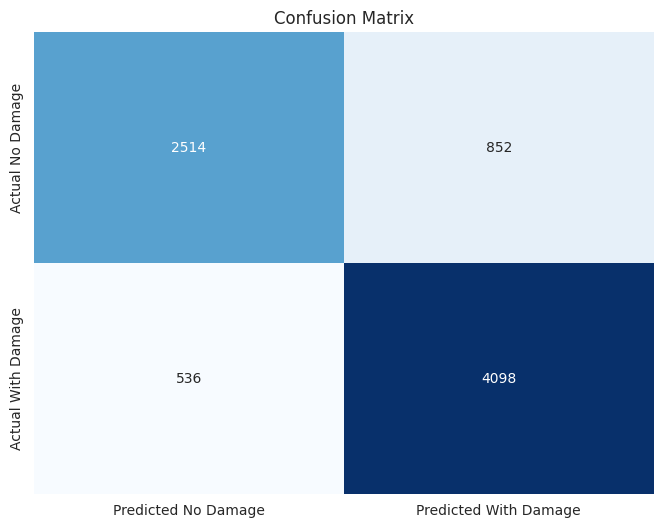

              precision    recall  f1-score   support

   No Damage       0.82      0.75      0.78      3366
 With Damage       0.83      0.88      0.86      4634

    accuracy                           0.83      8000
   macro avg       0.83      0.82      0.82      8000
weighted avg       0.83      0.83      0.83      8000
 

#### Test Set #### 



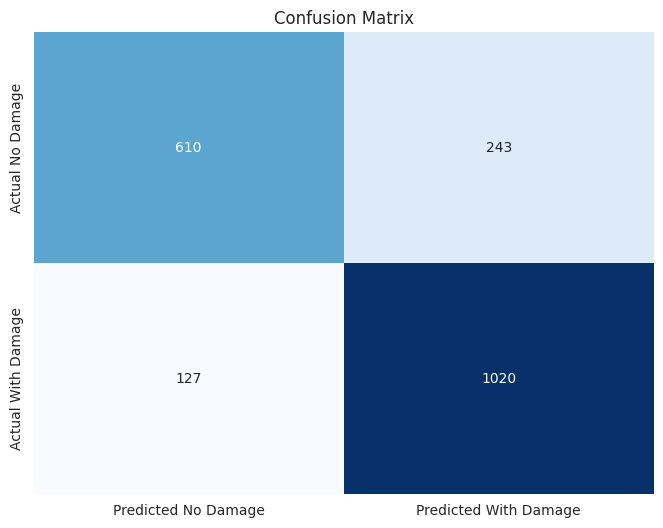

              precision    recall  f1-score   support

   No Damage       0.83      0.72      0.77       853
 With Damage       0.81      0.89      0.85      1147

    accuracy                           0.81      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.82      0.81      0.81      2000
 



In [28]:
classification_performance(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, pipeline2=pipeline2, label_map= ['No Damage', 'With Damage'])

### Summary and Observations:

* Performance on Train Set: the model has an accuracy of 83% and performs well. The recal for "With Damage" (0.88) is higher than for "No Damage" (0.75), meaning the model is better at predicting "With Damage" than "No Damage". The precision is relatively balanced between the two classes, meaning the model's predictions for both classes are equally reliable.
* Performance on Test Set: The accuracy is 81%, which is slightly lower than the training set, indicating a small performance drop when predicting on unseen data (a sign of minor overfitting). The model performs better at predictin "With Damage" (higher recall and F1-score). It misses more "No Damage"
* Conclusions: the model generalizes reasonably well between the training and test sets, with only a slight drop in performance. It shows better predictive power for the "With Damage" class, which may be due to the inherent distribution of the data or features related to the damage outcome. The overall performance is solid, but improvements could be made to reduce false negatives. (instances where )

Possible improvement: reduce false negatives (instances where "No Damage" is predicted, but the actual result is "With Damage") by using more complex models such as Decision Tree, Gradient Boosting and XG Boost.

---

# Tree-based models for Classification

Decision Tree, Gradient Boosting and XG Boost

### Decision Tree

In [29]:
from sklearn.pipeline import Pipeline

# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML aLgorithms
from sklearn.tree import DecisionTreeClassifier

def pipeline_decision_tree_classif():
    pipeline3 = Pipeline([
        ("ScaleMeGoodDecTree", StandardScaler()),
        ("SelectMeGoodDecTree", SelectFromModel(DecisionTreeClassifier(random_state=77))),
        ("ModelMeGoodDecTree", DecisionTreeClassifier(random_state=77)),
    ])
    return pipeline3

pipeline_decision_tree_classif()

Pipeline(steps=[('ScaleMeGoodDecTree', StandardScaler()),
                ('SelectMeGoodDecTree',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGoodDecTree',
                 DecisionTreeClassifier(random_state=77))])

In [30]:
# Fit the model
pipeline3 = pipeline_decision_tree_classif()
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('ScaleMeGoodDecTree', StandardScaler()),
                ('SelectMeGoodDecTree',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGoodDecTree',
                 DecisionTreeClassifier(random_state=77))])

In [31]:
# Evaluate the pipeline using .features_importance_
def feature_importance_dec_tree(model, columns):
    # Create DataFrame to display feature importance
    df_feature_importance = (pd.DataFrame(data={
        'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )
    best_features = df_feature_importance['Features'].to_list()

    # Most important features statement and plot
    print(f"* These are the {len(best_features)} most important features in descending order. " f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Features', y='Importance')
    plt.show()

* These are the 2 most important features in descending order. The model was trained on them: 
['Crm Cd', 'Weapon Used Cd']


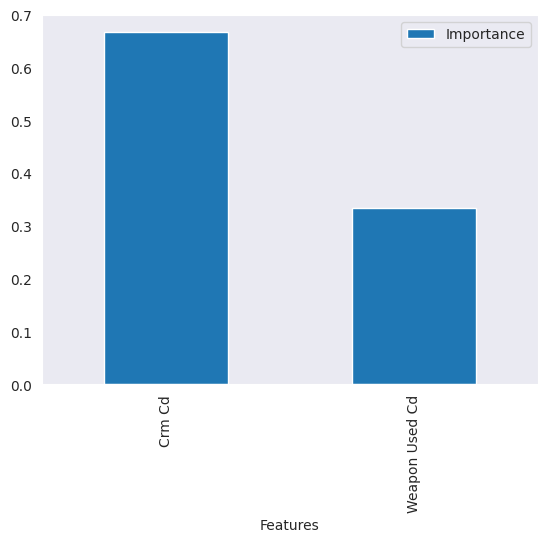

In [32]:
feature_importance_dec_tree(model = pipeline3['ModelMeGoodDecTree'],
                                     columns =  X_train.columns[pipeline3['SelectMeGoodDecTree'].get_support()]
                                     )

### Evaluating how good the pipeline fits the train and test set

In [33]:
# Loads confusion_matrix and classification_report from sklearn
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, label_map):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=["Actual " + sub for sub in label_map], columns=["Predicted " + sub for sub in label_map])

    # Plot the confusion matrix using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.show()

def confusion_matrix_and_report(X, y, pipeline3, label_map):
    # Predict the labels
    prediction = pipeline3.predict(X)
    
    # print('--- Confusion Matrix ---')
    # print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y), columns=[["Actual " + sub for sub in label_map]], index=[["Prediction " + sub for sub in label_map]]))
    plot_confusion_matrix(y_true=y, y_pred=prediction, label_map=label_map)

    # print('--- Classification Report ---')
    print(classification_report(y, prediction, target_names=label_map), "\n")

def classification_performance(X_train, y_train, X_test, y_test, pipeline3, label_map):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline3, label_map)

    print("#### Test Set #### \n")
    confusion_matrix_and_report(X_test, y_test, pipeline3, label_map)

### Using the custom classification evaluation function

#### Train Set #### 



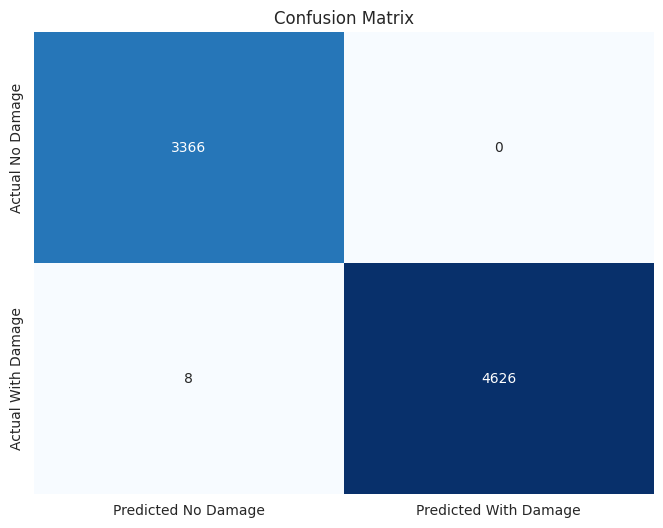

              precision    recall  f1-score   support

   No Damage       1.00      1.00      1.00      3366
 With Damage       1.00      1.00      1.00      4634

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000
 

#### Test Set #### 



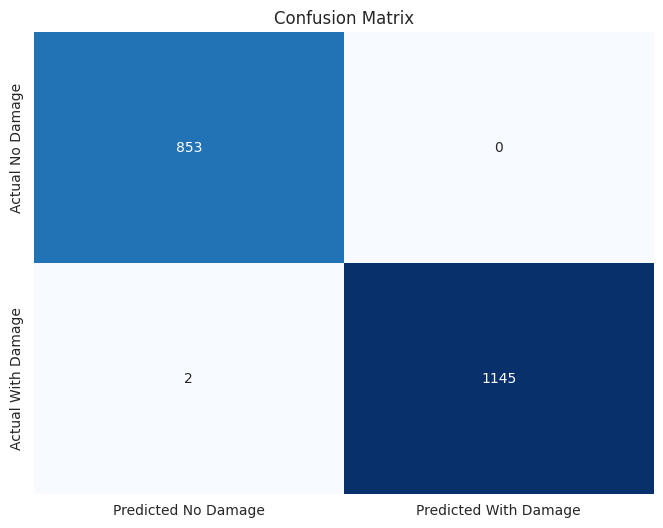

              precision    recall  f1-score   support

   No Damage       1.00      1.00      1.00       853
 With Damage       1.00      1.00      1.00      1147

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 



In [34]:
classification_performance(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, pipeline3=pipeline3, label_map= ['No Damage', 'With Damage'])

### Visualise the created tree

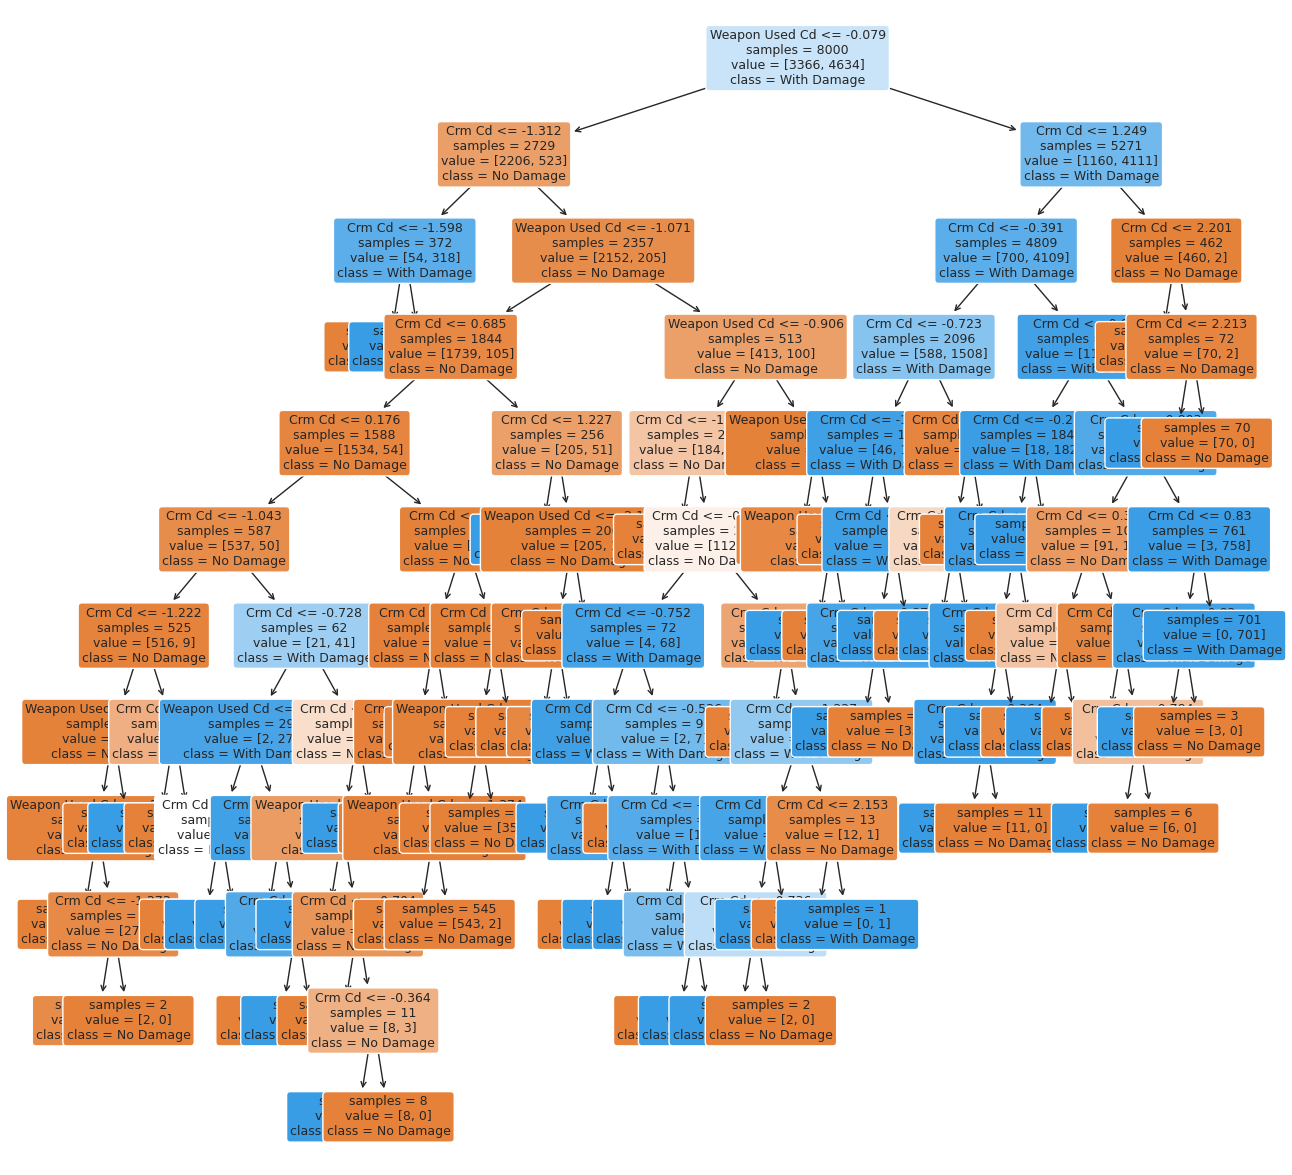

In [35]:
from sklearn import tree

fig = plt.figure(figsize=(15, 15))
tree.plot_tree(decision_tree = pipeline3['ModelMeGoodDecTree'], 
               feature_names = X_train.columns[pipeline3['SelectMeGoodDecTree'].get_support()],
               class_names = ['No Damage', 'With Damage'],
               filled=True,
               rounded=True,
               fontsize=9,
               impurity=False)

plt.show()

### Summary and Observations:

* Performance on Train Set: "With Damage" performing perfectly
* Performance on Test Set: "With Damage" performing perfectly
* Conclusions: An almost perfect precision, recall, and F1-scores on both the train and test sets, it is unusual and could indicate potential overfitting or data leakage. Yet we will remains with this for now.

Possible improvement: Perform further validation, such as cross-validation or testing on an external dataset, to ensure that the model generalizes well beyond the current data. If the model is overfitting, than we can apply regularization to the decision tree model.

### Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.pipeline import Pipeline

# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML aLgorithms
from sklearn.ensemble import GradientBoostingClassifier

def pipeline_gradient_boost_classif():
    pipeline4 = Pipeline([
        ("ScaleMeGoodGradBoost", StandardScaler()),
        ("SelectMeGoodGradBoost", SelectFromModel(GradientBoostingClassifier(random_state=77))),
        ("ModelMeGoodGradBoost", GradientBoostingClassifier(random_state=77)),
    ])
    return pipeline4

pipeline_gradient_boost_classif()

Pipeline(steps=[('ScaleMeGoodGradBoost', StandardScaler()),
                ('SelectMeGoodGradBoost',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=77))),
                ('ModelMeGoodGradBoost',
                 GradientBoostingClassifier(random_state=77))])

In [37]:
# Fit the model
pipeline4 = pipeline_gradient_boost_classif()
pipeline4.fit(X_train, y_train)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('ScaleMeGoodGradBoost', StandardScaler()),
                ('SelectMeGoodGradBoost',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=77))),
                ('ModelMeGoodGradBoost',
                 GradientBoostingClassifier(random_state=77))])

In [38]:
# Evaluate the pipeline using .features_importance_
def feature_importance_grad_boost(model, columns):
    # Create DataFrame to display feature importance
    df_feature_importance = (pd.DataFrame(data={
        'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )
    best_features = df_feature_importance['Features'].to_list()

    # Most important features statement and plot
    print(f"* These are the {len(best_features)} most important features in descending order. " f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Features', y='Importance')
    plt.show()

* These are the 2 most important features in descending order. The model was trained on them: 
['Crm Cd', 'Weapon Used Cd']


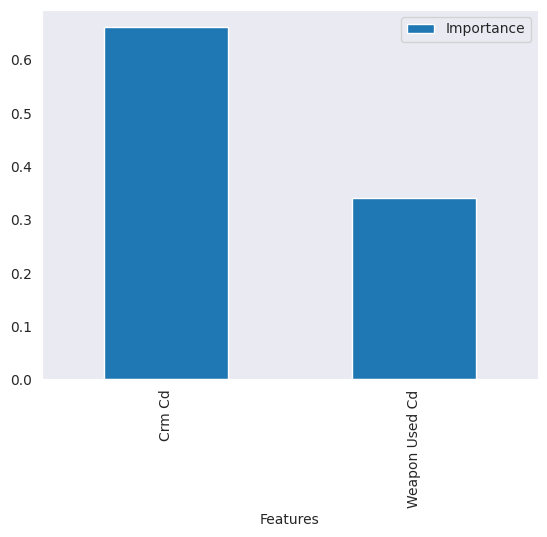

In [39]:
feature_importance_grad_boost(model = pipeline4['ModelMeGoodGradBoost'],
                                     columns =  X_train.columns[pipeline4['SelectMeGoodGradBoost'].get_support()]
                                     )

### Evaluating how good the pipeline fits the train and test set

In [40]:
# Loads confusion_matrix and classification_report from sklearn
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, label_map):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=["Actual " + sub for sub in label_map], columns=["Predicted " + sub for sub in label_map])

    # Plot the confusion matrix using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.show()

def confusion_matrix_and_report(X, y, pipeline4, label_map):
    # Predict the labels
    prediction = pipeline4.predict(X)
    
    # print('--- Confusion Matrix ---')
    # print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y), columns=[["Actual " + sub for sub in label_map]], index=[["Prediction " + sub for sub in label_map]]))
    plot_confusion_matrix(y_true=y, y_pred=prediction, label_map=label_map)

    # print('--- Classification Report ---')
    print(classification_report(y, prediction, target_names=label_map), "\n")

def classification_performance(X_train, y_train, X_test, y_test, pipeline4, label_map):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline4, label_map)

    print("#### Test Set #### \n")
    confusion_matrix_and_report(X_test, y_test, pipeline4, label_map)

### Using the custom classification evaluation function

#### Train Set #### 



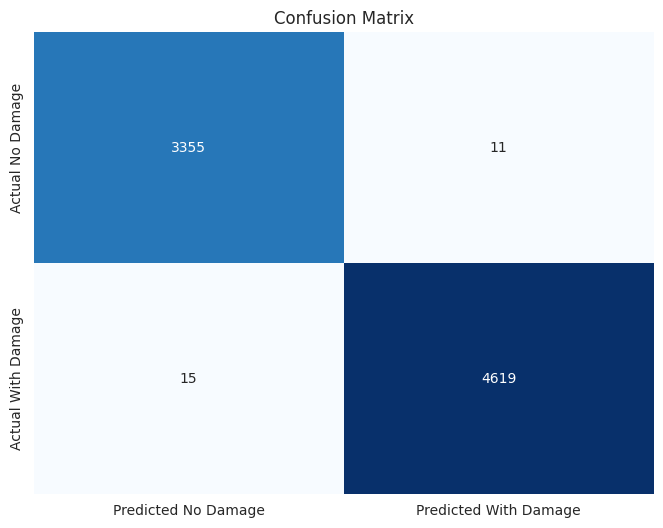

              precision    recall  f1-score   support

   No Damage       1.00      1.00      1.00      3366
 With Damage       1.00      1.00      1.00      4634

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000
 

#### Test Set #### 



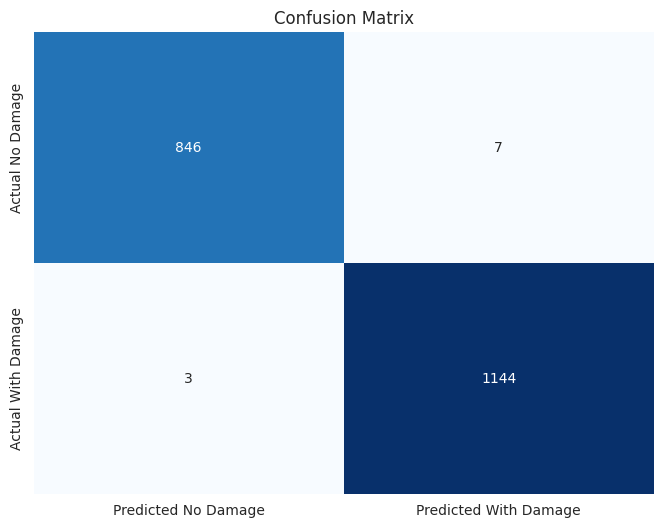

              precision    recall  f1-score   support

   No Damage       1.00      0.99      0.99       853
 With Damage       0.99      1.00      1.00      1147

    accuracy                           0.99      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      0.99      0.99      2000
 



In [41]:
classification_performance(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, pipeline4=pipeline4, label_map= ['No Damage', 'With Damage'])

### Summary and Observations:

* Performance on Train Set: "With Damage" performing almost perfectly
* Performance on Test Set: "With Damage" performing almost perfectly
* Conclusions: An almost perfect precision, recall, and F1-scores on both the train and test sets

this model is a bit less precise than the one before: decision tree

### XG Boost (eXtreme Gradient Boosting)

In [44]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 89.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 82.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML aLgorithms
from xgboost import XGBClassifier

def pipeline_xgboost_classif():
    pipeline5 = Pipeline([
        ("ScaleMeGoodXGBoost", StandardScaler()),
        ("SelectMeGoodXGBoost", SelectFromModel(XGBClassifier(random_state=77))),
        ("ModelMeGoodXGBoost", XGBClassifier(random_state=77)),
    ])
    return pipeline5

pipeline_xgboost_classif()

Pipeline(steps=[('ScaleMeGoodXGBoost', StandardScaler()),
                ('SelectMeGoodXGBoost',
                 SelectFromModel(estimator=XGBClassifier(base_score=None,
                                                         booster=None,
                                                         callbacks=None,
                                                         colsample_bylevel=None,
                                                         colsample_bynode=None,
                                                         colsample_bytree=None,
                                                         device=None,
                                                         early_stopping_rounds=None,
                                                         enable_categorical=False,
                                                         eval_metric=None,
                                                         feature_types=None,
                                                         gamma=None,
                                                         grow_poli...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=77, ...))])

In [47]:
# Fit the model
pipeline5 = pipeline_xgboost_classif()
pipeline5.fit(X_train, y_train)

Pipeline(steps=[('ScaleMeGoodXGBoost', StandardScaler()),
                ('SelectMeGoodXGBoost',
                 SelectFromModel(estimator=XGBClassifier(base_score=None,
                                                         booster=None,
                                                         callbacks=None,
                                                         colsample_bylevel=None,
                                                         colsample_bynode=None,
                                                         colsample_bytree=None,
                                                         device=None,
                                                         early_stopping_rounds=None,
                                                         enable_categorical=False,
                                                         eval_metric=None,
                                                         feature_types=None,
                                                         gamma=None,
                                                         grow_poli...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=77, ...))])

In [48]:
# Evaluate the pipeline using .features_importance_
def feature_importance_XG_boost(model, columns):
    # Create DataFrame to display feature importance
    df_feature_importance = (pd.DataFrame(data={
        'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )
    best_features = df_feature_importance['Features'].to_list()

    # Most important features statement and plot
    print(f"* These are the {len(best_features)} most important features in descending order. " f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Features', y='Importance')
    plt.show()

* These are the 2 most important features in descending order. The model was trained on them: 
['Weapon Used Cd', 'Crm Cd']


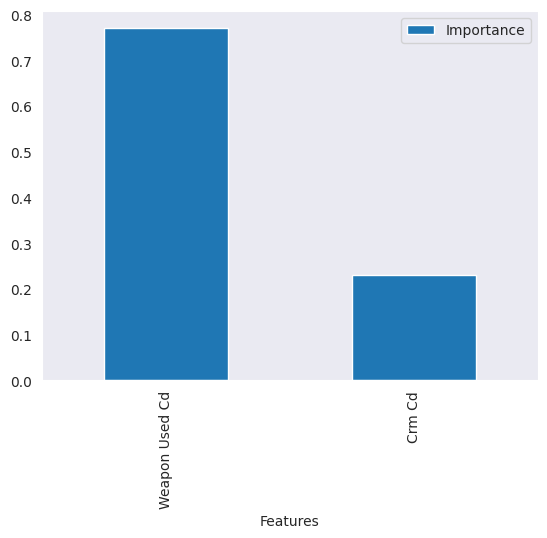

In [49]:
feature_importance_XG_boost(model = pipeline5['ModelMeGoodXGBoost'],
                                     columns =  X_train.columns[pipeline5['SelectMeGoodXGBoost'].get_support()]
                                     )

### Evaluating how good the pipeline fits the train and test set

In [55]:
# Loads confusion_matrix and classification_report from sklearn
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, label_map):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=["Actual " + sub for sub in label_map], columns=["Predicted " + sub for sub in label_map])

    # Plot the confusion matrix using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.show()

def confusion_matrix_and_report(X, y, pipeline5, label_map):
    # Predict the labels
    prediction = pipeline5.predict(X)
    
    # print('--- Confusion Matrix ---')
    plot_confusion_matrix(y_true=y, y_pred=prediction, label_map=label_map)

    # print('--- Classification Report ---')
    print(classification_report(y, prediction, target_names=label_map), "\n")

def classification_performance(X_train, y_train, X_test, y_test, pipeline5, label_map):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline5, label_map)

    print("#### Test Set #### \n")
    confusion_matrix_and_report(X_test, y_test, pipeline5, label_map)

### Using the custom classification evaluation function

#### Train Set #### 



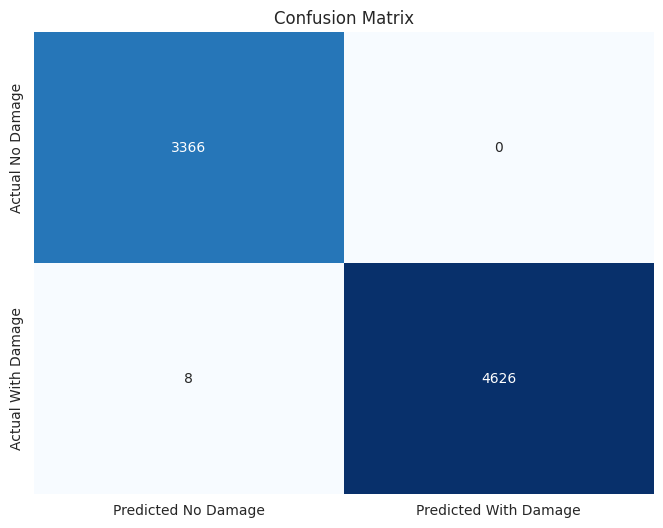

              precision    recall  f1-score   support

   No Damage       1.00      1.00      1.00      3366
 With Damage       1.00      1.00      1.00      4634

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000
 

#### Test Set #### 



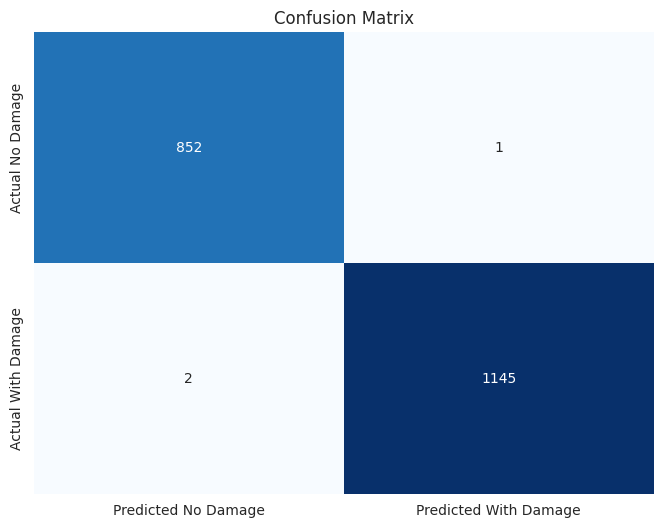

              precision    recall  f1-score   support

   No Damage       1.00      1.00      1.00       853
 With Damage       1.00      1.00      1.00      1147

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 



In [56]:
classification_performance(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, pipeline5=pipeline5, label_map= ['No Damage', 'With Damage'])

### Summary and Observations:

* Performance on Train Set: "With Damage" performing almost perfectly
* Performance on Test Set: "With Damage" performing almost perfectly
* Conclusions: An almost perfect precision, recall, and F1-scores on both the train and test sets

this model is a little less precise than Decision Tree. Therfore will use `Decision Tree`.

---

# Cross Validation Search (GridSearchCV) and Hyperparameter Optimization

### GridSearchCV

In [57]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML aLgorithms
from sklearn.tree import DecisionTreeClassifier

def pipeline_decision_tree_classif_CV():
    pipelineCV = Pipeline([
        ("ScaleMeGoodDecTreeCV", StandardScaler()),
        ("SelectMeGoodDecTreeCV", SelectFromModel(DecisionTreeClassifier(random_state=77))),
        ("ModelMeGoodDecTreeCV", DecisionTreeClassifier(random_state=77)),
    ])
    return pipelineCV

pipeline_decision_tree_classif_CV()

Pipeline(steps=[('ScaleMeGoodDecTreeCV', StandardScaler()),
                ('SelectMeGoodDecTreeCV',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGoodDecTreeCV',
                 DecisionTreeClassifier(random_state=77))])

### Parsing the algorithm's hyperparameters in a dictionary

In [58]:
param_grid = {"ModelMeGoodDecTreeCV__n_estimators":[50,20],
              }

param_grid

{'ModelMeGoodDecTreeCV__n_estimators': [50, 20]}

### For Classification Binary (0-1), the potential performance metrics are: accuracy, recall, precision, and f1 score.
When the metric is either recall, precision or f1 score, we need to inform which class we want to tune for and use make_scorer() as an "auxiliary" function to help define the metric and the class to tune. The documentation for make_scorer is found here
When your performance metric is recall, you need to import recall_score, if it is precision, precision_score and if it is f1 score, you need to import f1_score; so you can parse the metric to the make_scorer() function.
When your performance metric is accuracy, you simply write "accuracy" for scoring: scoring='accuracy'

In [59]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import f1_score # for metric as f1 score
from sklearn.metrics import precision_score # for metric as precision

In [60]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipeline_decision_tree_classif_CV(),
                    param_grid=param_grid,
                    cv=2,
                    n_jobs=-2,
                    verbose=3,  # for learning, we set 3 to print the score from every cross-validation
                    scoring=make_scorer(recall_score, pos_label=0))


grid.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


ValueError: Invalid parameter 'n_estimators' for estimator DecisionTreeClassifier(random_state=77). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].